In [1]:
import glob, json, argparse, os, sys
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Bio.PDB import *

sys.path.insert(0,'/data1/groups/keatinglab/swans/savinovCollaboration/inhibitory_fragments_structure_prediction')
from src.colabfold_process_output_utils import *
from src.colabfold_process_output import *

# Import data

In [26]:
df = pd.read_csv('/data1/groups/keatinglab/swans/savinovCollaboration/analysis/process_colabfold_output/colabfold_predictions.csv',index_col=0)
df

,fragment_name,start,aa.fragmentCenter,end,iptm,plddt,n_contacts,path,_merge,weighted_contacts
0,folA_1-159_folA_7-36,7,21.5,36,0.103046,84.774000,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000
1,folA_1-159_folA_8-37,8,22.5,37,0.105501,86.700667,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000
2,folA_1-159_folA_9-38,9,23.5,38,0.123415,83.461667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.123415
3,folA_1-159_folA_10-39,10,24.5,39,0.123641,83.581000,2,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.247281
4,folA_1-159_folA_11-40,11,25.5,40,0.143685,83.008667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.143685
...,...,...,...,...,...,...,...,...,...,...
3334,ssb4copies_1-178_ssb_145-174,145,159.5,174,0.689092,35.271667,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000
3335,ssb4copies_1-178_ssb_146-175,146,160.5,175,0.687369,36.244667,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000
3336,ssb4copies_1-178_ssb_147-176,147,161.5,176,0.683096,31.469667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.683096
3337,ssb4copies_1-178_ssb_148-177,148,162.5,177,0.690097,34.799667,2,/data1/groups/keatinglab/swans/savinovCollabor...,both,1.380195


In [5]:
path_to_experimental_df = '/home/gridsan/sswanson/keatinglab_shared/swans/savinovCollaboration/inhibitory_fragments_structure_prediction/data/Savinov_2022_inhib_peptide_mapping.csv'
exp_df = pd.read_csv(path_to_experimental_df)
exp_df

,gene,fragment ID,fragment start (aa),fragment end (aa),fragment center (aa),fragment length (aa),E = inhibitory effect (enrichment),sem(E),hydrophobicity_KyteDoolittle_classifier,instabIndex_Guruprasad_classifier,charge_Lehninger_classifier,frag_contains_alphaHelix,frag_contains_betaStrand,frag_contains_Turn,frag_centroid_fractional_position_classifier
0,EGFP-coding-pEGFP,EGFP-coding-pEGFP_16_45_+,6,15,10.5,10,0.277702,0.038327,hydrophobic,unstable,negative,1.0,1.0,0.0,N-terminal
1,EGFP-coding-pEGFP,EGFP-coding-pEGFP_16_90_+,6,30,18.0,25,-0.417512,0.105113,hydrophobic,stable,negative,1.0,1.0,0.0,N-terminal
2,EGFP-coding-pEGFP,EGFP-coding-pEGFP_16_165_+,6,55,30.5,50,-0.461540,0.310617,hydrophobic,stable,negative,1.0,1.0,0.0,N-terminal
3,EGFP-coding-pEGFP,EGFP-coding-pEGFP_19_48_+,7,16,11.5,10,0.359055,0.004247,hydrophobic,stable,negative,1.0,1.0,0.0,N-terminal
4,EGFP-coding-pEGFP,EGFP-coding-pEGFP_19_78_+,7,26,16.5,20,0.568066,0.056597,hydrophobic,stable,negative,1.0,1.0,0.0,N-terminal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12075,ssb-coding-EcoliBL21DE3,ssb-coding-EcoliBL21DE3_466_510_+,156,170,163.0,15,-0.088757,0.425062,hydrophilic,unstable,negative,0.0,0.0,0.0,C-terminal
12076,ssb-coding-EcoliBL21DE3,ssb-coding-EcoliBL21DE3_466_525_+,156,175,165.5,20,0.241237,0.162285,hydrophilic,unstable,negative,0.0,0.0,0.0,C-terminal
12077,ssb-coding-EcoliBL21DE3,ssb-coding-EcoliBL21DE3_469_528_+,157,176,166.5,20,0.269504,0.051534,hydrophilic,unstable,negative,0.0,0.0,0.0,C-terminal
12078,ssb-coding-EcoliBL21DE3,ssb-coding-EcoliBL21DE3_472_531_+,158,177,167.5,20,0.112903,0.120788,hydrophilic,unstable,negative,0.0,0.0,0.0,C-terminal


<AxesSubplot:xlabel='fragment length (aa)', ylabel='Count'>

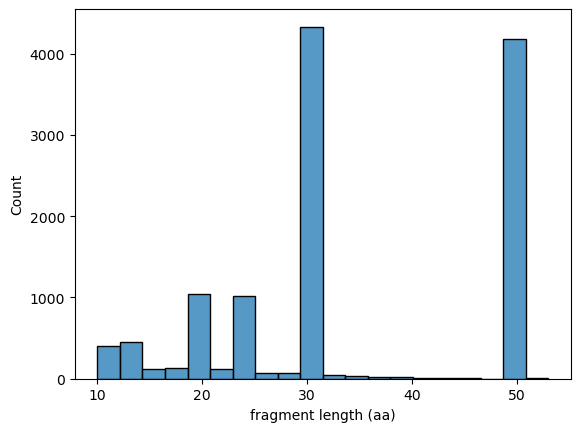

In [48]:
sns.histplot(data=exp_df,x='fragment length (aa)')

4312

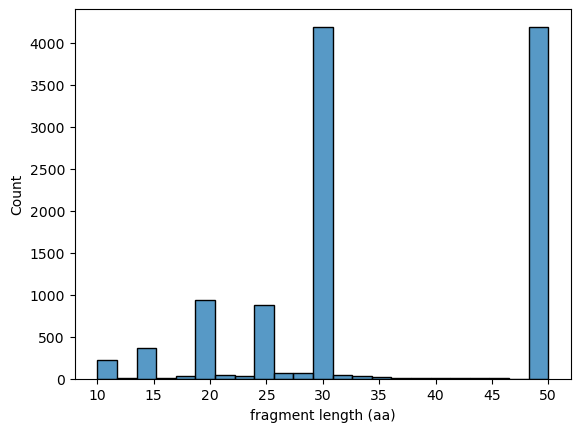

In [46]:
sns.histplot(data=exp_df[exp_df['gene']!='folA-coding-EcoliBL21DE3'],x='fragment length (aa)')
len(exp_df[exp_df['fragment length (aa)']==30])

## merge

In [27]:
exp_df['gene'].unique()

array(['EGFP-coding-pEGFP', 'folA-coding-EcoliBL21DE3',
       'ftsZ-coding-EcoliBL21DE3', 'groL-coding-EcoliBL21DE3',
       'groS-coding-EcoliBL21DE3', 'gyrA-coding-EcoliBL21DE3',
       'ileS-coding-EcoliBL21DE3', 'lptG-coding-EcoliBL21DE3',
       'rpIL-coding-EcoliBL21DE3', 'rpoB-coding-EcoliBL21DE3',
       'ssb-coding-EcoliBL21DE3'], dtype=object)

In [28]:
df['gene'] = df['fragment_name'].apply(lambda x: x.split('_')[-2])
print(df['gene'].unique())
df = df.replace({
    'folA':'folA-coding-EcoliBL21DE3',
    'FtsZ':'ftsZ-coding-EcoliBL21DE3',
    'groEL':'groL-coding-EcoliBL21DE3',
    'gyrA':'gyrA-coding-EcoliBL21DE3',
    'lptG':'lptG-coding-EcoliBL21DE3',
    'rpIL':'rpIL-coding-EcoliBL21DE3',
    'ssb':'ssb-coding-EcoliBL21DE3'
})
df.head()

['folA' 'FtsZ' 'groEL' 'gyrA' 'lptG' 'rpIL' 'ssb']


,fragment_name,start,aa.fragmentCenter,end,iptm,plddt,n_contacts,path,_merge,weighted_contacts,gene
0,folA_1-159_folA_7-36,7,21.5,36,0.103046,84.774000,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000,folA-coding-EcoliBL21DE3
1,folA_1-159_folA_8-37,8,22.5,37,0.105501,86.700667,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000,folA-coding-EcoliBL21DE3
2,folA_1-159_folA_9-38,9,23.5,38,0.123415,83.461667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.123415,folA-coding-EcoliBL21DE3
3,folA_1-159_folA_10-39,10,24.5,39,0.123641,83.581000,2,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.247281,folA-coding-EcoliBL21DE3
4,folA_1-159_folA_11-40,11,25.5,40,0.143685,83.008667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.143685,folA-coding-EcoliBL21DE3


In [29]:
renamed_df = df.rename(columns={'start':'fragment start (aa)',
                'aa.fragmentCenter':'fragment center (aa)',
                'end':'fragment end (aa)'})
renamed_df.head()

,fragment_name,fragment start (aa),fragment center (aa),fragment end (aa),iptm,plddt,n_contacts,path,_merge,weighted_contacts,gene
0,folA_1-159_folA_7-36,7,21.5,36,0.103046,84.774000,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000,folA-coding-EcoliBL21DE3
1,folA_1-159_folA_8-37,8,22.5,37,0.105501,86.700667,0,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.000000,folA-coding-EcoliBL21DE3
2,folA_1-159_folA_9-38,9,23.5,38,0.123415,83.461667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.123415,folA-coding-EcoliBL21DE3
3,folA_1-159_folA_10-39,10,24.5,39,0.123641,83.581000,2,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.247281,folA-coding-EcoliBL21DE3
4,folA_1-159_folA_11-40,11,25.5,40,0.143685,83.008667,1,/data1/groups/keatinglab/swans/savinovCollabor...,both,0.143685,folA-coding-EcoliBL21DE3


In [45]:
len(renamed_df)

3339

In [44]:
renamed_df.groupby(['gene','fragment start (aa)','fragment center (aa)','fragment end (aa)']).ngroups

2426

In [41]:
merge_on_list = ['gene','fragment start (aa)','fragment center (aa)','fragment end (aa)']
exp_30_df = exp_df[exp_df['fragment length (aa)']==30]
merge_df = renamed_df.merge(exp_30_df,how='left',on=merge_on_list,validate='one_to_one')
merge_df

MergeError: Merge keys are not unique in left dataset; not a one-to-one merge